In [306]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm


In [4]:
b = pd.read_csv("btc_apr4.csv", index_col=False)

In [5]:
b.head()

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses
0,2013-05-01,1.086597e+08,52443,1.542820e+09,139.00,0.0,3575.0,36.806000,null
1,2013-05-02,9.695852e+07,55169,1.292190e+09,116.38,0.0,3425.0,54.407916,null
2,2013-05-03,8.445970e+07,55636,1.180070e+09,106.25,0.0,3650.0,48.526772,null
3,2013-05-04,4.154584e+07,48595,1.089890e+09,98.10,0.0,3900.0,43.419694,null
4,2013-05-05,5.620593e+07,49907,1.254760e+09,112.90,0.0,3875.0,38.408956,null


In [6]:
e = pd.read_csv("eth_apr4.csv", index_col=False)
bch = pd.read_csv("bch_apr4.csv", index_col=False)
l = pd.read_csv("ltc_apr4.csv", index_col=False)


In [8]:
e.tail()

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses
964,2018-03-31,5.945374e+08,584396,3.891490e+10,395.00,1.323920e+09,20460.84375,281.163320,259652
965,2018-04-01,5.041092e+08,545141,3.914470e+10,397.25,1.256930e+09,20205.00000,250.986522,242923
966,2018-04-02,5.470639e+08,598505,3.742250e+10,379.70,1.102260e+09,20465.25000,308.536535,273668
967,2018-04-03,6.490071e+08,645977,3.818080e+10,387.31,1.363400e+09,20389.59375,332.168332,297312
968,2018-04-04,6.546792e+08,628441,4.106510e+10,416.49,1.287730e+09,20299.68750,283.251215,278603


In [10]:
e.tail()

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses
964,2018-03-31,5.945374e+08,584396,3.891490e+10,395.00,1.323920e+09,20460.84375,281.163320,259652
965,2018-04-01,5.041092e+08,545141,3.914470e+10,397.25,1.256930e+09,20205.00000,250.986522,242923
966,2018-04-02,5.470639e+08,598505,3.742250e+10,379.70,1.102260e+09,20465.25000,308.536535,273668
967,2018-04-03,6.490071e+08,645977,3.818080e+10,387.31,1.363400e+09,20389.59375,332.168332,297312
968,2018-04-04,6.546792e+08,628441,4.106510e+10,416.49,1.287730e+09,20299.68750,283.251215,278603


In [14]:
e.columns = [str(col) + '_e' for col in e.columns]
bch.columns = [str(col) + '_bch' for col in bch.columns]
l.columns = [str(col) + '_l' for col in l.columns]

In [15]:
e.head()

,date_e_e,txVolume(USD)_e_e,txCount_e_e,marketcap(USD)_e_e,price(USD)_e_e,exchangeVolume(USD)_e_e,generatedCoins_e_e,fees_e_e,activeAddresses_e_e
0,2015-08-10,1.193011e+06,1999,43130000.0,0.713989,405283.0,27817.34375,31.165144,1001
1,2015-08-11,1.051922e+06,4945,42796500.0,0.708087,1463100.0,28027.81250,11.311449,2342
2,2015-08-12,7.923327e+05,1993,64018400.0,1.060000,2150620.0,27370.93750,32.586992,906
3,2015-08-13,2.181179e+06,2807,73935400.0,1.220000,4068680.0,28268.12500,24.929169,1274
4,2015-08-14,4.154763e+06,3144,109594000.0,1.810000,4637030.0,31106.71875,14.354834,1594


In [16]:
#rename date columns
e.rename(columns={'date_e_e':'date'}, inplace=True)
bch.rename(columns={'date_bch':'date'}, inplace=True)
l.rename(columns={'date_l':'date'}, inplace=True)

In [88]:
dfs = [b, e, l]
df_final = reduce(lambda left,right: pd.merge(left,right,on='date'), dfs)

In [170]:
future = pd.read_csv("CBOE2.csv")

In [171]:
future.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,4/6/18,"6,830","6,790","6,880","6,730",0,0.59
1,4/5/18,"6,790","6,780","6,910","6,560",0,-1.45
2,4/4/18,"6,890","7,440","7,440","6,740",4.69K,-7.95
3,4/3/18,"7,485","6,970","7,520","6,970",3.24K,7.16
4,4/2/18,"6,985","6,920","7,140","6,770",4.26K,2.27


In [172]:
future.columns = [str(col) + '_futures' for col in future.columns]
future.rename(columns={'Date_futures':'date'}, inplace=True)


In [89]:
df_final['date']= pd.to_datetime(df_final['date'])

In [90]:
df_final.head()

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,txVolume(USD)_e_e,...,fees_e_e,activeAddresses_e_e,txVolume(USD)_l,txCount_l,marketcap(USD)_l,price(USD)_l,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l
0,2015-08-10,2.878211e+08,111405,3.843850e+09,265.48,20979400.0,4325.0,27.213482,null,1.193011e+06,...,31.165144,1001,1.519340e+07,3438,162062000.0,3.90,2239890.0,27700.0,70.602802,null
1,2015-08-11,2.799356e+08,117239,3.828500e+09,264.34,25433900.0,4200.0,26.633347,null,1.051922e+06,...,11.311449,2342,1.428503e+07,3470,164164000.0,3.95,3426300.0,28950.0,64.651515,null
2,2015-08-12,3.124407e+08,116367,3.920210e+09,270.60,26815400.0,3075.0,25.367459,null,7.923327e+05,...,32.586992,906,2.004033e+07,3528,172371000.0,4.14,3519900.0,27850.0,55.462690,null
3,2015-08-13,3.386269e+08,117871,3.857090e+09,266.18,27685500.0,3750.0,25.047151,null,2.181179e+06,...,24.929169,1274,9.130571e+06,3178,165366000.0,3.97,2409030.0,28300.0,55.447488,null
4,2015-08-14,3.291484e+08,111030,3.828340e+09,264.13,27091200.0,3375.0,24.336399,null,4.154763e+06,...,14.354834,1594,1.052652e+07,3134,161665000.0,3.88,3157170.0,28050.0,56.810211,null


In [91]:
df_final2 = pd.merge(df_final, future, on='date', how='left')

In [92]:
df_final2.head()

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,txVolume(USD)_e_e,...,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l,Price_futures,Open_futures,High_futures,Low_futures,Vol._futures,Change %_futures
0,2015-08-10,2.878211e+08,111405,3.843850e+09,265.48,20979400.0,4325.0,27.213482,null,1.193011e+06,...,2239890.0,27700.0,70.602802,null,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-11,2.799356e+08,117239,3.828500e+09,264.34,25433900.0,4200.0,26.633347,null,1.051922e+06,...,3426300.0,28950.0,64.651515,null,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-12,3.124407e+08,116367,3.920210e+09,270.60,26815400.0,3075.0,25.367459,null,7.923327e+05,...,3519900.0,27850.0,55.462690,null,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-13,3.386269e+08,117871,3.857090e+09,266.18,27685500.0,3750.0,25.047151,null,2.181179e+06,...,2409030.0,28300.0,55.447488,null,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-08-14,3.291484e+08,111030,3.828340e+09,264.13,27091200.0,3375.0,24.336399,null,4.154763e+06,...,3157170.0,28050.0,56.810211,null,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_final.to_csv("without_future.csv")

In [45]:
df_final.to_csv("with_future.csv")

In [100]:
vendor = pd.read_csv("v.csv", encoding ='ISO-8859-1')

In [101]:
vendor.head()

,category,created_on,lattitude,longitude,name,venue_id
0,atm,1465943680,50.122064,-5.532898,One And All,8225
1,default,1397211665,60.160534,24.939049,Belle Modeste,42
2,grocery,1394219130,48.437747,-123.312411,Slaters Meats,15
3,default,1422120857,50.065833,14.358897,kaktusy eshop,33
4,food,1370785480,51.549378,-0.059379,Pembury Tavern,3


In [102]:
vendor['created_on'] = vendor['created_on'].astype('str')

In [103]:
vendor['created_on'].nunique()

12024

In [104]:
import numpy as np
vendor.created_on = pd.to_numeric(vendor.created_on, errors='coerce').fillna(0).astype(np.int64)


In [105]:
vendor.created_on.dtype

dtype('int64')

In [106]:
vendor['date']=pd.to_datetime(vendor.created_on, unit='s')

In [107]:
vendor.head()

,category,created_on,lattitude,longitude,name,venue_id,date
0,atm,1465943680,50.122064,-5.532898,One And All,8225,2016-06-14 22:34:40
1,default,1397211665,60.160534,24.939049,Belle Modeste,42,2014-04-11 10:21:05
2,grocery,1394219130,48.437747,-123.312411,Slaters Meats,15,2014-03-07 19:05:30
3,default,1422120857,50.065833,14.358897,kaktusy eshop,33,2015-01-24 17:34:17
4,food,1370785480,51.549378,-0.059379,Pembury Tavern,3,2013-06-09 13:44:40


In [108]:
pd.DatetimeIndex(vendor.date).normalize()

DatetimeIndex(['2016-06-14', '2014-04-11', '2014-03-07', '2015-01-24',
               '2013-06-09', '2014-12-06', '2013-04-14', '2013-12-11',
               '2014-04-30', '2014-01-11',
               ...
               '2018-04-05', '2018-04-05', '2018-04-05', '2018-04-05',
               '2018-04-05', '2018-04-05', '2018-04-05', '2018-04-05',
               '2018-04-05', '2018-04-05'],
              dtype='datetime64[ns]', name='date', length=12193, freq=None)

In [109]:
vendor['date'] = pd.DatetimeIndex(vendor['date']).normalize()

In [114]:
vendor = vendor.drop_duplicates(subset=['longitude', 'lattitude'], keep=False)
vendor.head()


,category,created_on,lattitude,longitude,name,venue_id,date
0,atm,1465943680,50.122064,-5.532898,One And All,8225,2016-06-14
1,default,1397211665,60.160534,24.939049,Belle Modeste,42,2014-04-11
2,grocery,1394219130,48.437747,-123.312411,Slaters Meats,15,2014-03-07
3,default,1422120857,50.065833,14.358897,kaktusy eshop,33,2015-01-24
4,food,1370785480,51.549378,-0.059379,Pembury Tavern,3,2013-06-09


In [115]:
vendor.shape

(12138, 7)

In [87]:
df_final.head()

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,txVolume(USD)_e_e,...,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l,category,venue_id,name,longitude,created_on,lattitude
0,2015-08-10,2.878211e+08,111405,3.843850e+09,265.48,20979400.0,4325.0,27.213482,null,1.193011e+06,...,2239890.0,27700.0,70.602802,null,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-11,2.799356e+08,117239,3.828500e+09,264.34,25433900.0,4200.0,26.633347,null,1.051922e+06,...,3426300.0,28950.0,64.651515,null,lodging,7081,Budapest rental apartment,19.0352618694305,1.439276e+09,47.5211930487257
2,2015-08-11,2.799356e+08,117239,3.828500e+09,264.34,25433900.0,4200.0,26.633347,null,1.051922e+06,...,3426300.0,28950.0,64.651515,null,default,7082,Trader's Way,-61.369993686676,1.439277e+09,15.3052760472856
3,2015-08-11,2.799356e+08,117239,3.828500e+09,264.34,25433900.0,4200.0,26.633347,null,1.051922e+06,...,3426300.0,28950.0,64.651515,null,transport,7083,Rikscha Tours of Berlin,13.4103584289551,1.439310e+09,52.5212510869188
4,2015-08-12,3.124407e+08,116367,3.920210e+09,270.60,26815400.0,3075.0,25.367459,null,7.923327e+05,...,3519900.0,27850.0,55.462690,null,default,7084,Success Tax Professionals,115.788398981094,1.439373e+09,-31.7818091952088


In [117]:
vendor.to_csv("vendor_date.csv")

In [118]:
vendor_count = vendor.groupby(by = ['date'])['venue_id'].count() 


In [120]:
vendor_count.to_csv("vendor_count.csv")

In [95]:
vendor.shape

(24089, 7)

In [175]:
vc = pd.read_csv("vendor_count.csv")

In [176]:
vc.head()

,date,count,sum
0,2/28/13,1,1
1,3/3/13,1,2
2,3/4/13,1,3
3,4/13/13,1,4
4,4/14/13,8,12


In [177]:
vc['date']=pd.to_datetime(vc['date']).dt.strftime('%Y-%m-%d')

In [178]:
vc.head()

,date,count,sum
0,2013-02-28,1,1
1,2013-03-03,1,2
2,2013-03-04,1,3
3,2013-04-13,1,4
4,2013-04-14,8,12


In [179]:
b_v = pd.merge(b, vc, on='date',how='left')

In [180]:
b_v.head()

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,count,sum
0,2013-05-01,1.086597e+08,52443,1.542820e+09,139.00,0.0,3575.0,36.806000,null,1.0,37.0
1,2013-05-02,9.695852e+07,55169,1.292190e+09,116.38,0.0,3425.0,54.407916,null,1.0,38.0
2,2013-05-03,8.445970e+07,55636,1.180070e+09,106.25,0.0,3650.0,48.526772,null,2.0,40.0
3,2013-05-04,4.154584e+07,48595,1.089890e+09,98.10,0.0,3900.0,43.419694,null,1.0,41.0
4,2013-05-05,5.620593e+07,49907,1.254760e+09,112.90,0.0,3875.0,38.408956,null,NaN,NaN


In [ ]:
df_fin = pd.merge(df_final, vc, on='date',how='left'

In [147]:
future.head()

,date,Price_futures,Open_futures,High_futures,Low_futures,Vol._futures,Change %_futures
0,"Apr 05, 2018","6,790","6,780","6,910","6,560",0,-1.45
1,"Apr 04, 2018","6,890","7,440","7,440","6,740",4.69K,-7.95
2,"Apr 03, 2018","7,485","6,970","7,520","6,970",3.24K,7.16
3,"Apr 02, 2018","6,985","6,920","7,140","6,770",4.26K,2.27
4,"Apr 01, 2018","6,830","6,860","6,900","6,780",0,-5.66


In [181]:
future['date'] = pd.to_datetime(future['date']).dt.strftime('%Y-%m-%d')

In [182]:
future['date'].dtype

dtype('O')

In [183]:
future.head()

,date,Price_futures,Open_futures,High_futures,Low_futures,Vol._futures,Change %_futures
0,2018-04-06,"6,830","6,790","6,880","6,730",0,0.59
1,2018-04-05,"6,790","6,780","6,910","6,560",0,-1.45
2,2018-04-04,"6,890","7,440","7,440","6,740",4.69K,-7.95
3,2018-04-03,"7,485","6,970","7,520","6,970",3.24K,7.16
4,2018-04-02,"6,985","6,920","7,140","6,770",4.26K,2.27


In [208]:
dfs_2 = [b_v, e, l]
df_final = reduce(lambda left,right: pd.merge(left,right,on='date'), dfs_2)

In [185]:
df_final.head()

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,txVolume(USD)_e_e,...,fees_e_e,activeAddresses_e_e,txVolume(USD)_l,txCount_l,marketcap(USD)_l,price(USD)_l,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l
0,2015-08-10,2.878211e+08,111405,3.843850e+09,265.48,20979400.0,4325.0,27.213482,null,1.193011e+06,...,31.165144,1001,1.519340e+07,3438,162062000.0,3.90,2239890.0,27700.0,70.602802,null
1,2015-08-11,2.799356e+08,117239,3.828500e+09,264.34,25433900.0,4200.0,26.633347,null,1.051922e+06,...,11.311449,2342,1.428503e+07,3470,164164000.0,3.95,3426300.0,28950.0,64.651515,null
2,2015-08-12,3.124407e+08,116367,3.920210e+09,270.60,26815400.0,3075.0,25.367459,null,7.923327e+05,...,32.586992,906,2.004033e+07,3528,172371000.0,4.14,3519900.0,27850.0,55.462690,null
3,2015-08-13,3.386269e+08,117871,3.857090e+09,266.18,27685500.0,3750.0,25.047151,null,2.181179e+06,...,24.929169,1274,9.130571e+06,3178,165366000.0,3.97,2409030.0,28300.0,55.447488,null
4,2015-08-14,3.291484e+08,111030,3.828340e+09,264.13,27091200.0,3375.0,24.336399,null,4.154763e+06,...,14.354834,1594,1.052652e+07,3134,161665000.0,3.88,3157170.0,28050.0,56.810211,null


In [214]:
df_futre = pd.merge(df_final, future, on='date',how='left')
df_futre['date'] = pd.to_datetime(df_futre.date)

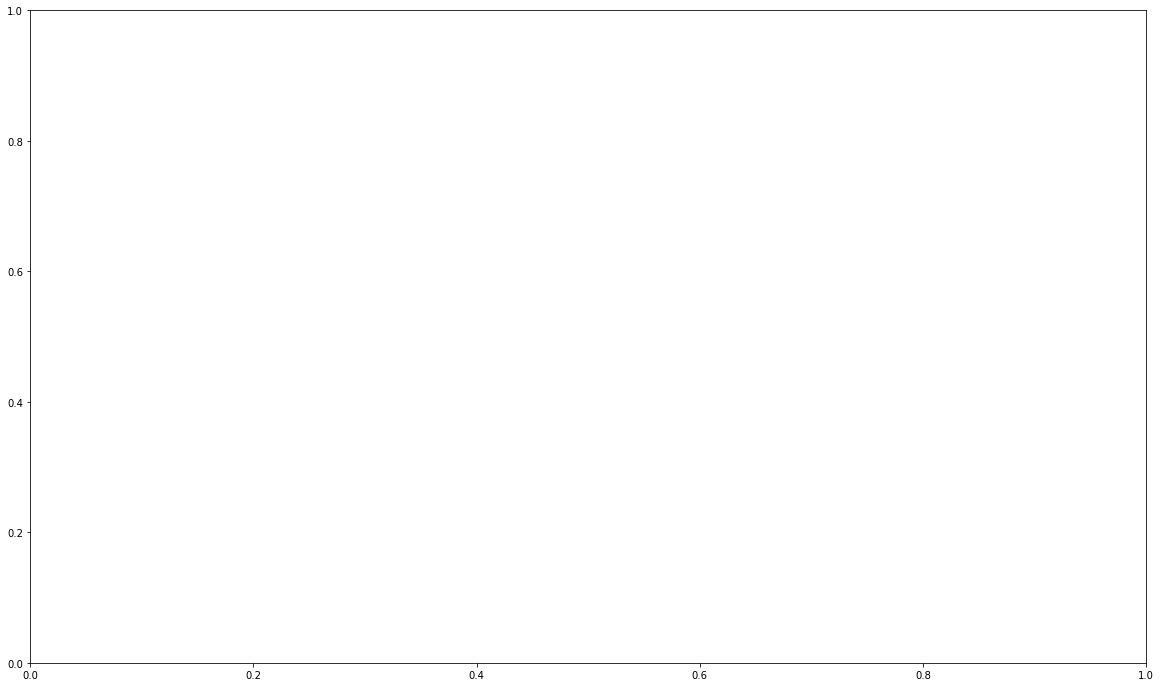

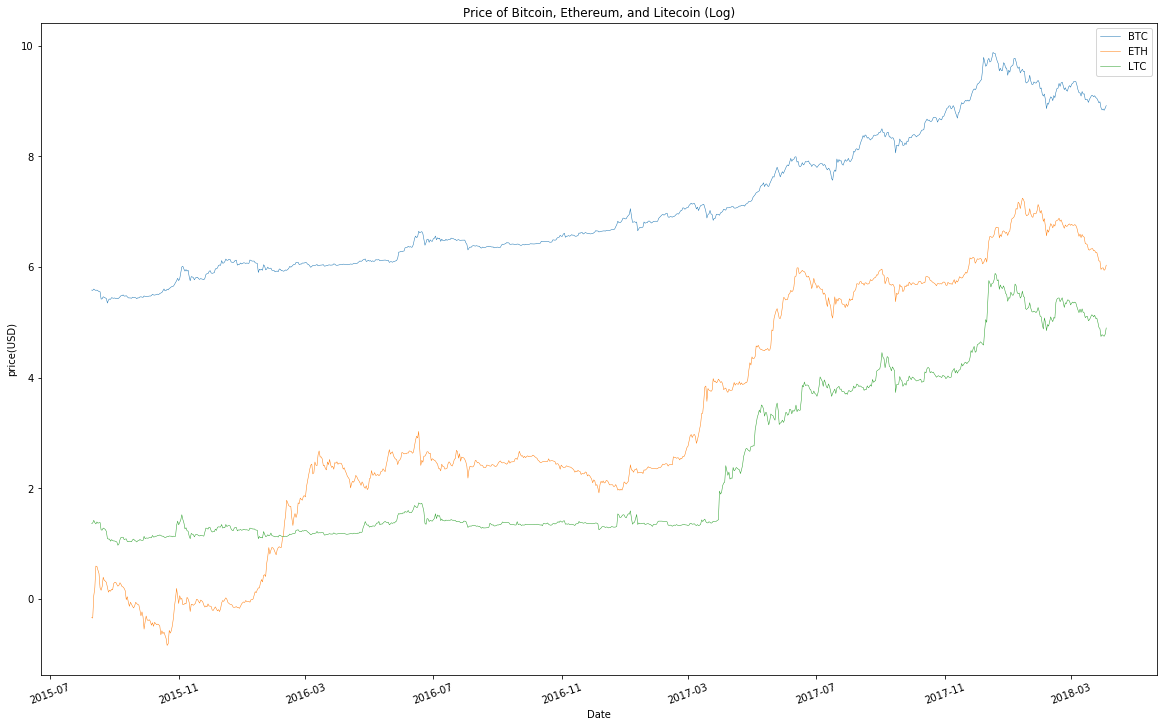

In [215]:
x = df_futre['date']
y = df_futre['price(USD)'].apply(np.log)
y_eth = df_futre['price(USD)_e_e'].apply(np.log)
y_ltc = df_futre["price(USD)_l"].apply(np.log)

fig = plt.figure()
fig = plt.figure(figsize=(20,12))

fig = plt.plot(x,y,label = "BTC", linewidth=0.5) #thêm legend parameter
fig = plt.plot(x,y_eth,label = "ETH", linewidth=0.5)
fig = plt.plot(x,y_ltc,label="LTC", linewidth=0.5)
fig =plt.xlabel("Date")
fig = plt.xticks(rotation='20')
fig = plt.ylabel("price(USD)")
fig =plt.title("Price of Bitcoin, Ethereum, and Litecoin (Log)")
fig = plt.legend() #thêm hàm legend()
fig = plt.savefig("BTL_log.png")
plt.show()


In [216]:
df_futre_only = pd.merge(df_final, future, on='date',how='right')

In [217]:
list(df_futre.columns.values)

['date',
 'txVolume(USD)',
 'txCount',
 'marketcap(USD)',
 'price(USD)',
 'exchangeVolume(USD)',
 'generatedCoins',
 'fees',
 'activeAddresses',
 'count',
 'sum',
 'txVolume(USD)_e_e',
 'txCount_e_e',
 'marketcap(USD)_e_e',
 'price(USD)_e_e',
 'exchangeVolume(USD)_e_e',
 'generatedCoins_e_e',
 'fees_e_e',
 'activeAddresses_e_e',
 'txVolume(USD)_l',
 'txCount_l',
 'marketcap(USD)_l',
 'price(USD)_l',
 'exchangeVolume(USD)_l',
 'generatedCoins_l',
 'fees_l',
 'activeAddresses_l',
 'Price_futures',
 'Open_futures',
 'High_futures',
 'Low_futures',
 'Vol._futures',
 'Change %_futures']

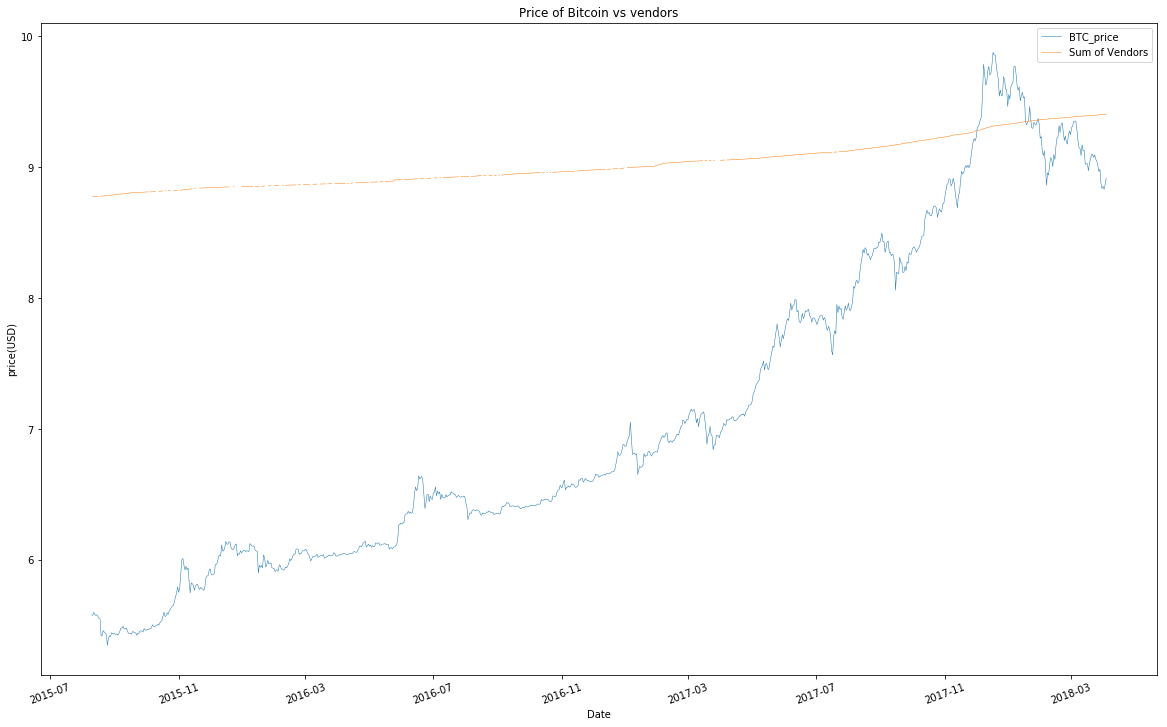

In [221]:
x = df_futre['date']
y = df_futre['price(USD)'].apply(np.log)
y_eth = df_futre['sum'].apply(np.log)

fig = plt.figure()
fig = plt.figure(figsize=(20,12))

fig = plt.plot(x,y,label = "BTC_price", linewidth=0.5) #thêm legend parameter
fig = plt.plot(x,y_eth,label = "Sum of Vendors", linewidth=0.5)
fig =plt.xlabel("Date")
fig = plt.xticks(rotation='20')
fig = plt.ylabel("price(USD)")
fig =plt.title("Price of Bitcoin vs vendors")
fig = plt.legend() #thêm hàm legend()
fig = plt.savefig("vendors.png")
plt.show()


In [230]:
df_futre.to_csv('data.csv')

In [234]:
gg = pd.read_csv("google/btc_googletrend.csv")

In [232]:
gg.head()

,Unnamed: 0,Day,bitcoin: (Worldwide)_x,Ethereum: (Worldwide),Litecoin: (Worldwide),Ripple: (Worldwide),bitcoin: (Worldwide)_y
0,0,1/1/16,62,0.1,2.0,11,NaN
1,1,1/2/16,62,1.0,2.0,9,NaN
2,2,1/3/16,61,1.0,2.0,11,56.0
3,3,1/4/16,67,1.0,2.0,11,NaN
4,4,1/5/16,66,1.0,2.0,11,NaN


In [246]:
del gg['bitcoin: (Worldwide)_y']


In [237]:
gg.head()

,Day,bitcoin: (Worldwide)_x,Ethereum: (Worldwide),Litecoin: (Worldwide),Ripple: (Worldwide),bitcoin: (Worldwide)_y
0,1/1/16,62,0.1,2.0,11,NaN
1,1/2/16,62,1.0,2.0,9,NaN
2,1/3/16,61,1.0,2.0,11,56.0
3,1/4/16,67,1.0,2.0,11,NaN
4,1/5/16,66,1.0,2.0,11,NaN


In [254]:
yearly = pd.read_csv("yearly2.csv")

In [256]:
yearly.columns = [str(col) + '_yearly' for col in yearly.columns]

In [261]:
yearly.rename(columns={'date':'Day'}, inplace=True)

In [260]:
yearly.head()

,date,bitcoin: (Worldwide)_yearly,ethereum: (Worldwide)_yearly,litecoin: (Worldwide)_yearly
0,4/7/13,11,0.1,1.0
1,4/14/13,6,0.1,0.1
2,4/21/13,4,0.1,0.1
3,4/28/13,3,0.1,0.1
4,5/5/13,2,0.1,0.1


In [262]:
gg.head()

,Day,bitcoin: (Worldwide)_x,Ethereum: (Worldwide),Litecoin: (Worldwide),Ripple: (Worldwide)
0,1/1/16,62,0.1,2.0,11
1,1/2/16,62,1.0,2.0,9
2,1/3/16,61,1.0,2.0,11
3,1/4/16,67,1.0,2.0,11
4,1/5/16,66,1.0,2.0,11


In [263]:
gg.colums=['Day','Bitcoin_per','Ether_per','Lite_per','Ripple_per']

In [264]:
gg.head()

,Day,bitcoin: (Worldwide)_x,Ethereum: (Worldwide),Litecoin: (Worldwide),Ripple: (Worldwide)
0,1/1/16,62,0.1,2.0,11
1,1/2/16,62,1.0,2.0,9
2,1/3/16,61,1.0,2.0,11
3,1/4/16,67,1.0,2.0,11
4,1/5/16,66,1.0,2.0,11


In [265]:
m = pd.merge(gg, yearly, on='Day', how='left')

In [266]:
m.to_csv('merged_google_trend.csv')

In [278]:
m = pd.read_csv('merged_indexed.csv')

In [279]:
m.tail()

,date,btc_per,eth_per,ltc_per
1178,3/24/18,15,1.0,1.0
1179,3/25/18,15,2.0,1.0
1180,3/26/18,20,2.0,1.0
1181,3/27/18,19,2.0,1.0
1182,3/28/18,17,2.0,1.0


In [280]:
m['date']=pd.to_datetime(m['date']).dt.strftime('%Y-%m-%d')

In [285]:
m.head()

,date,btc_per,eth_per,ltc_per
0,2015-01-01,45,0.1,3.0
1,2015-01-02,51,0.1,2.0
2,2015-01-03,54,0.1,3.0
3,2015-01-04,62,0.1,2.0
4,2015-01-05,64,1.0,2.0


In [286]:
df_futre['date']=pd.to_datetime(df_futre['date']).dt.strftime('%Y-%m-%d')

In [287]:
df_futre.tail()

,date,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,fees,activeAddresses,count,...,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l,Price_futures,Open_futures,High_futures,Low_futures,Vol._futures,Change %_futures
964,2018-03-31,3.370052e+09,148489,1.168200e+11,6892.48,4.553270e+09,1600.0,20.074476,null,3.0,...,295439000.0,15150.0,28.223009,null,NaN,NaN,NaN,NaN,NaN,NaN
965,2018-04-01,3.681134e+09,134967,1.187050e+11,7003.06,4.532100e+09,2025.0,18.281805,null,3.0,...,274182000.0,15250.0,25.901551,null,"6,830","6,860","6,900","6,780",0,-5.66
966,2018-04-02,5.878175e+09,168022,1.160370e+11,6844.86,4.333440e+09,1950.0,21.392483,null,3.0,...,271703000.0,14650.0,36.323501,null,"6,985","6,920","7,140","6,770",4.26K,2.27
967,2018-04-03,6.956277e+09,198756,1.204150e+11,7102.26,5.499700e+09,2037.5,25.129299,null,5.0,...,375409000.0,14600.0,42.639301,null,"7,485","6,970","7,520","6,970",3.24K,7.16
968,2018-04-04,5.007762e+09,185563,1.264340e+11,7456.41,4.936000e+09,1837.5,24.818994,null,4.0,...,380351000.0,14950.0,32.619950,null,"6,890","7,440","7,440","6,740",4.69K,-7.95


In [288]:
df_futre2 = pd.merge(m, df_futre, on='date',how='right')

In [289]:
df_futre2.head()

,date,btc_per,eth_per,ltc_per,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),generatedCoins,...,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l,Price_futures,Open_futures,High_futures,Low_futures,Vol._futures,Change %_futures
0,2015-08-10,59.0,2.0,2.0,2.878211e+08,111405,3.843850e+09,265.48,20979400.0,4325.0,...,2239890.0,27700.0,70.602802,null,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-08-11,62.0,3.0,2.0,2.799356e+08,117239,3.828500e+09,264.34,25433900.0,4200.0,...,3426300.0,28950.0,64.651515,null,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-12,61.0,3.0,2.0,3.124407e+08,116367,3.920210e+09,270.60,26815400.0,3075.0,...,3519900.0,27850.0,55.462690,null,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-08-13,64.0,4.0,2.0,3.386269e+08,117871,3.857090e+09,266.18,27685500.0,3750.0,...,2409030.0,28300.0,55.447488,null,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-08-14,58.0,5.0,2.0,3.291484e+08,111030,3.828340e+09,264.13,27091200.0,3375.0,...,3157170.0,28050.0,56.810211,null,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
ca = pd.read_csv("google/ca-q1-201.csv")

In [295]:
ca.head()

,Day,cyber attack
0,1/1/15,9.0
1,1/2/15,30.0
2,1/3/15,27.0
3,1/4/15,16.0
4,1/5/15,23.0


In [297]:
ca['date']=pd.to_datetime(ca['Day']).dt.strftime('%Y-%m-%d')

In [298]:
df_futre3 = pd.merge(ca, df_futre2, on='date',how='right')

In [300]:
df_futre3.tail()

,Day,cyber attack,date,btc_per,eth_per,ltc_per,txVolume(USD),txCount,marketcap(USD),price(USD),...,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l,Price_futures,Open_futures,High_futures,Low_futures,Vol._futures,Change %_futures
964,NaN,NaN,2018-03-31,NaN,NaN,NaN,3.370052e+09,148489,1.168200e+11,6892.48,...,295439000.0,15150.0,28.223009,null,NaN,NaN,NaN,NaN,NaN,NaN
965,NaN,NaN,2018-04-01,NaN,NaN,NaN,3.681134e+09,134967,1.187050e+11,7003.06,...,274182000.0,15250.0,25.901551,null,"6,830","6,860","6,900","6,780",0,-5.66
966,NaN,NaN,2018-04-02,NaN,NaN,NaN,5.878175e+09,168022,1.160370e+11,6844.86,...,271703000.0,14650.0,36.323501,null,"6,985","6,920","7,140","6,770",4.26K,2.27
967,NaN,NaN,2018-04-03,NaN,NaN,NaN,6.956277e+09,198756,1.204150e+11,7102.26,...,375409000.0,14600.0,42.639301,null,"7,485","6,970","7,520","6,970",3.24K,7.16
968,NaN,NaN,2018-04-04,NaN,NaN,NaN,5.007762e+09,185563,1.264340e+11,7456.41,...,380351000.0,14950.0,32.619950,null,"6,890","7,440","7,440","6,740",4.69K,-7.95


In [305]:
df_futre3['Price_futures'].fillna(0, inplace=True)


In [302]:
df_futre3.to_csv("updated.csv")

In [303]:
non_na.to_csv("update_withoutna.csv")

In [319]:
new = pd.read_csv("update_futures_filled.csv")

In [320]:
new.head()

,count,date,btc_per,eth_per,ltc_per,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),...,activeAddresses_e_e,txVolume(USD)_l,txCount_l,marketcap(USD)_l,price(USD)_l,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l,Price_futures
0,0,8/10/15,59.0,2.0,2.0,287821077.5,111405,3.843850e+09,265.48,20979400,...,1001,1.519340e+07,3438,162062000,3.90,2239890,27700.0,70.602802,null,0
1,1,8/11/15,62.0,3.0,2.0,279935629.2,117239,3.828500e+09,264.34,25433900,...,2342,1.428503e+07,3470,164164000,3.95,3426300,28950.0,64.651515,null,0
2,2,8/12/15,61.0,3.0,2.0,312440693.0,116367,3.920210e+09,270.60,26815400,...,906,2.004033e+07,3528,172371000,4.14,3519900,27850.0,55.462690,null,0
3,3,8/13/15,64.0,4.0,2.0,338626860.8,117871,3.857090e+09,266.18,27685500,...,1274,9.130571e+06,3178,165366000,3.97,2409030,28300.0,55.447488,null,0
4,4,8/14/15,58.0,5.0,2.0,329148435.5,111030,3.828340e+09,264.13,27091200,...,1594,1.052652e+07,3134,161665000,3.88,3157170,28050.0,56.810211,null,0


In [321]:
vix = pd.read_csv("vixcurrent.csv")

In [322]:
vix.head()

,date,VIX Open,VIX High,VIX Low,VIX Close
0,1/2/04,17.96,18.68,17.54,18.22
1,1/5/04,18.45,18.49,17.44,17.49
2,1/6/04,17.66,17.67,16.19,16.73
3,1/7/04,16.72,16.75,15.50,15.50
4,1/8/04,15.42,15.68,15.32,15.61


In [323]:
merge2 = pd.merge(new, vix, on='date',how='left')

In [324]:
merge2.head()

,count,date,btc_per,eth_per,ltc_per,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),...,price(USD)_l,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l,Price_futures,VIX Open,VIX High,VIX Low,VIX Close
0,0,8/10/15,59.0,2.0,2.0,287821077.5,111405,3.843850e+09,265.48,20979400,...,3.90,2239890,27700.0,70.602802,null,0,12.73,12.78,12.18,12.23
1,1,8/11/15,62.0,3.0,2.0,279935629.2,117239,3.828500e+09,264.34,25433900,...,3.95,3426300,28950.0,64.651515,null,0,13.24,14.33,13.02,13.71
2,2,8/12/15,61.0,3.0,2.0,312440693.0,116367,3.920210e+09,270.60,26815400,...,4.14,3519900,27850.0,55.462690,null,0,15.19,16.28,13.45,13.61
3,3,8/13/15,64.0,4.0,2.0,338626860.8,117871,3.857090e+09,266.18,27685500,...,3.97,2409030,28300.0,55.447488,null,0,13.87,14.33,13.06,13.49
4,4,8/14/15,58.0,5.0,2.0,329148435.5,111030,3.828340e+09,264.13,27091200,...,3.88,3157170,28050.0,56.810211,null,0,13.69,13.87,12.80,12.83


In [327]:
ca = pd.read_csv("google/ca-q1-201.csv")

In [328]:
ca.head()

,Day,cyber attack
0,1/1/15,9.0
1,1/2/15,30.0
2,1/3/15,27.0
3,1/4/15,16.0
4,1/5/15,23.0


In [329]:
ca.rename(columns={'Day':'date'}, inplace=True)


In [363]:
merge3 = pd.merge(merge2, ca, on='date',how='left')

In [364]:
merge3.head()

,count,date,btc_per,eth_per,ltc_per,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),...,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l,Price_futures,VIX Open,VIX High,VIX Low,VIX Close,cyber attack
0,0,8/10/15,59.0,2.0,2.0,287821077.5,111405,3.843850e+09,265.48,20979400,...,2239890,27700.0,70.602802,null,0,12.73,12.78,12.18,12.23,10.0
1,1,8/11/15,62.0,3.0,2.0,279935629.2,117239,3.828500e+09,264.34,25433900,...,3426300,28950.0,64.651515,null,0,13.24,14.33,13.02,13.71,11.0
2,2,8/12/15,61.0,3.0,2.0,312440693.0,116367,3.920210e+09,270.60,26815400,...,3519900,27850.0,55.462690,null,0,15.19,16.28,13.45,13.61,8.0
3,3,8/13/15,64.0,4.0,2.0,338626860.8,117871,3.857090e+09,266.18,27685500,...,2409030,28300.0,55.447488,null,0,13.87,14.33,13.06,13.49,7.0
4,4,8/14/15,58.0,5.0,2.0,329148435.5,111030,3.828340e+09,264.13,27091200,...,3157170,28050.0,56.810211,null,0,13.69,13.87,12.80,12.83,4.0


In [366]:
merge3.tail()

,count,date,btc_per,eth_per,ltc_per,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),...,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l,Price_futures,VIX Open,VIX High,VIX Low,VIX Close,cyber attack
964,964,3/31/18,NaN,NaN,NaN,3.370052e+09,148489,1.170000e+11,6892.48,4553270000,...,295439000,15150.0,28.223009,null,"6,933",NaN,NaN,NaN,NaN,NaN
965,965,4/1/18,NaN,NaN,NaN,3.681134e+09,134967,1.190000e+11,7003.06,4532100000,...,274182000,15250.0,25.901551,null,"6,830",NaN,NaN,NaN,NaN,NaN
966,966,4/2/18,NaN,NaN,NaN,5.878175e+09,168022,1.160000e+11,6844.86,4333440000,...,271703000,14650.0,36.323501,null,"6,985",21.07,25.72,20.44,23.62,NaN
967,967,4/3/18,NaN,NaN,NaN,6.956277e+09,198756,1.200000e+11,7102.26,5499700000,...,375409000,14600.0,42.639301,null,"7,485",23.03,23.38,20.92,21.10,NaN
968,968,4/4/18,NaN,NaN,NaN,5.007762e+09,185563,1.260000e+11,7456.41,4936000000,...,380351000,14950.0,32.619950,null,"6,890",21.68,24.51,19.86,20.06,NaN


In [332]:
merge3['dum_future']=0

In [335]:
merge3.loc[merge3.Price_futures != '0'] = 1


In [373]:
merge3.date = pd.to_datetime(merge3.date)

In [338]:
merge3['dum_chinaban'] = 0 

In [369]:
merge3.tail()

,count,date,btc_per,eth_per,ltc_per,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),...,exchangeVolume(USD)_l,generatedCoins_l,fees_l,activeAddresses_l,Price_futures,VIX Open,VIX High,VIX Low,VIX Close,cyber attack
964,964,3/31/18,NaN,NaN,NaN,3.370052e+09,148489,1.170000e+11,6892.48,4553270000,...,295439000,15150.0,28.223009,null,"6,933",NaN,NaN,NaN,NaN,NaN
965,965,4/1/18,NaN,NaN,NaN,3.681134e+09,134967,1.190000e+11,7003.06,4532100000,...,274182000,15250.0,25.901551,null,"6,830",NaN,NaN,NaN,NaN,NaN
966,966,4/2/18,NaN,NaN,NaN,5.878175e+09,168022,1.160000e+11,6844.86,4333440000,...,271703000,14650.0,36.323501,null,"6,985",21.07,25.72,20.44,23.62,NaN
967,967,4/3/18,NaN,NaN,NaN,6.956277e+09,198756,1.200000e+11,7102.26,5499700000,...,375409000,14600.0,42.639301,null,"7,485",23.03,23.38,20.92,21.10,NaN
968,968,4/4/18,NaN,NaN,NaN,5.007762e+09,185563,1.260000e+11,7456.41,4936000000,...,380351000,14950.0,32.619950,null,"6,890",21.68,24.51,19.86,20.06,NaN


In [347]:
t = pd.read_csv("BCHAIN-HRATE.csv")
t.columns = ['date','hashrate']

In [349]:
t1 = pd.read_csv("BCHAIN-DIFF.csv")
t1.columns = ['date','diff']

In [348]:
t.head()

,date,hashrate
0,2018-04-10,2.565676e+07
1,2018-04-09,2.810026e+07
2,2018-04-08,3.141644e+07
3,2018-04-07,2.408594e+07
4,2018-04-06,2.722758e+07


In [350]:
me = pd.merge(t, t1, on='date',how='left')

In [351]:
me.head()

,date,hashrate,diff
0,2018-04-10,2.565676e+07,3.511061e+12
1,2018-04-09,2.810026e+07,3.511061e+12
2,2018-04-08,3.141644e+07,3.511061e+12
3,2018-04-07,2.408594e+07,3.511061e+12
4,2018-04-06,2.722758e+07,3.511061e+12


In [354]:
me['date'] = me['date'].astype('str')


In [357]:
me['date']=pd.to_datetime(me['date'])

In [358]:
me.head()

,date,hashrate,diff
0,2018-04-10,2.565676e+07,3.511061e+12
1,2018-04-09,2.810026e+07,3.511061e+12
2,2018-04-08,3.141644e+07,3.511061e+12
3,2018-04-07,2.408594e+07,3.511061e+12
4,2018-04-06,2.722758e+07,3.511061e+12


In [374]:
merge4 = pd.merge(merge3, me, on='date',how='left')

In [375]:
merge4.tail()

,count,date,btc_per,eth_per,ltc_per,txVolume(USD),txCount,marketcap(USD),price(USD),exchangeVolume(USD),...,fees_l,activeAddresses_l,Price_futures,VIX Open,VIX High,VIX Low,VIX Close,cyber attack,hashrate,diff
964,964,2018-03-31,NaN,NaN,NaN,3.370052e+09,148489,1.170000e+11,6892.48,4553270000,...,28.223009,null,"6,933",NaN,NaN,NaN,NaN,NaN,2.788407e+07,3.462542e+12
965,965,2018-04-01,NaN,NaN,NaN,3.681134e+09,134967,1.190000e+11,7003.06,4532100000,...,25.901551,null,"6,830",NaN,NaN,NaN,NaN,NaN,2.203186e+07,3.462542e+12
966,966,2018-04-02,NaN,NaN,NaN,5.878175e+09,168022,1.160000e+11,6844.86,4333440000,...,36.323501,null,"6,985",21.07,25.72,20.44,23.62,NaN,2.827479e+07,3.494289e+12
967,967,2018-04-03,NaN,NaN,NaN,6.956277e+09,198756,1.200000e+11,7102.26,5499700000,...,42.639301,null,"7,485",23.03,23.38,20.92,21.10,NaN,2.722758e+07,3.511061e+12
968,968,2018-04-04,NaN,NaN,NaN,5.007762e+09,185563,1.260000e+11,7456.41,4936000000,...,32.619950,null,"6,890",21.68,24.51,19.86,20.06,NaN,2.844933e+07,3.511061e+12


In [376]:
merge4.to_csv("ver4.csv")